In [14]:
import pandas as pd
import spacy
from textblob_de import TextBlobDE

# Load the spacy model
nlp = spacy.load("de_core_news_sm")

# Load the data
df = pd.read_csv('swiss_no_outliers_and_cleaned.csv')

# Ensure all entries in 'description' column are strings
df['description'] = df['description'].astype(str)

# Function to extract topics and perform sentiment analysis
def analyze_sentiment(text):
    review = nlp(text)
    topics = {}

    for sentence in review.sents:
        sentence_document = nlp(sentence.text)
        for token in sentence_document:
            if token.pos_ == "NOUN" and token.dep_ =="nsubj":
                topics[token.text] = sentence_document.text

    sentiment_dict = {}

    for topic, sentence in topics.items():
        sentiment_score = TextBlobDE(sentence).sentiment.polarity
        sentiment_dict[topic] = sentiment_score

    return sentiment_dict

# Apply sentiment analysis on the 'description' column
df['sentiment'] = df['description'].apply(analyze_sentiment)

# Display the dataframe
print(df)


      Rooms  Footage  Rent                                     address   
0       5.5      150  2480        Hofackerstrasse 6, 8444 Henggart, ZH  \
1       3.5       63  1740              Schmittegass 11, 8197 Rafz, ZH   
2       3.5      104  2270     Zürcherstrasse 163, 8406 Winterthur, ZH   
3       3.5       83  2290      Usterstrasse 125, 8620 Wetzikon ZH, ZH   
4       2.5       57  1580         Mörlerstrasse 22, 8248 Uhwiesen, ZH   
...     ...      ...   ...                                         ...   
8402    4.5       98  1550                        2340 Le Noirmont, JU   
8403    3.0       80  1500                         2900 Porrentruy, JU   
8404    3.5       75  1275             Rue du soleil, 2907 Rocourt, JU   
8405    3.5       65   975    Rue Saint-Germain 3, 2853 Courfaivre, JU   
8406    3.5       71   980  Route de Fontenais 31, 2900 Porrentruy, JU   

                                                  title   
0     «Tolle 5.5-Zimmer-Maisonettewohnung an bevorzu

In [23]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Load the dataset
df = pd.read_csv('swiss_no_outliers_and_cleaned.csv')

# Instantiate a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Function to analyze the sentiment of a text
def analyze_sentiment(text):
    # Analyze the sentiment and return the compound score
    return sia.polarity_scores(str(text))['compound']

# Apply the function on the 'description' column
df['sentiment'] = df['description'].apply(analyze_sentiment)

# Print the dataframe
print(df)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\remy\AppData\Roaming\nltk_data...


      Rooms  Footage  Rent                                     address   
0       5.5      150  2480        Hofackerstrasse 6, 8444 Henggart, ZH  \
1       3.5       63  1740              Schmittegass 11, 8197 Rafz, ZH   
2       3.5      104  2270     Zürcherstrasse 163, 8406 Winterthur, ZH   
3       3.5       83  2290      Usterstrasse 125, 8620 Wetzikon ZH, ZH   
4       2.5       57  1580         Mörlerstrasse 22, 8248 Uhwiesen, ZH   
...     ...      ...   ...                                         ...   
8402    4.5       98  1550                        2340 Le Noirmont, JU   
8403    3.0       80  1500                         2900 Porrentruy, JU   
8404    3.5       75  1275             Rue du soleil, 2907 Rocourt, JU   
8405    3.5       65   975    Rue Saint-Germain 3, 2853 Courfaivre, JU   
8406    3.5       71   980  Route de Fontenais 31, 2900 Porrentruy, JU   

                                                  title   
0     «Tolle 5.5-Zimmer-Maisonettewohnung an bevorzu

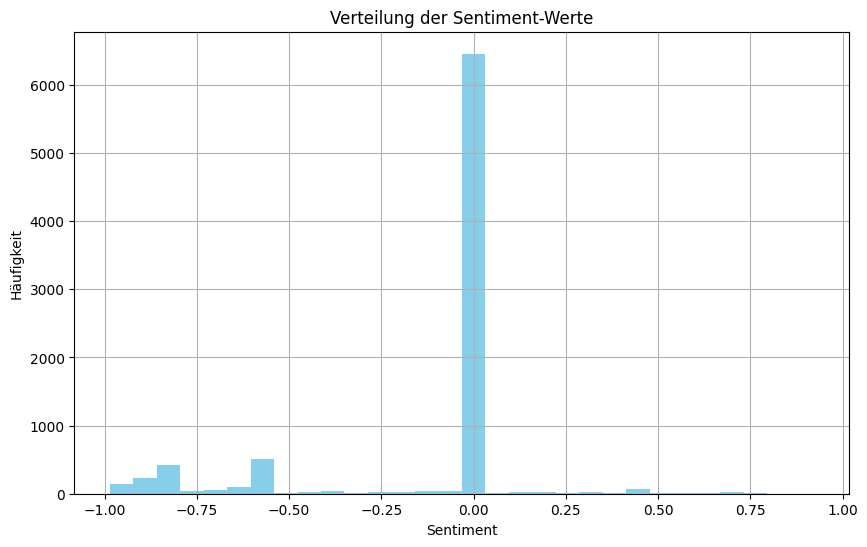

In [24]:
#visualisierung
import matplotlib.pyplot as plt

# Erstellen Sie ein Histogramm der Sentiment-Werte
plt.figure(figsize=(10,6))
plt.hist(df['sentiment'], bins=30, color='skyblue')
plt.title('Verteilung der Sentiment-Werte')
plt.xlabel('Sentiment')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()


In [25]:
# Sortiere die Daten nach Sentiment und wähle die Top 10 positiven Einträge aus
top_positive = df.sort_values(by='sentiment', ascending=False).head(10)

# Sortiere die Daten nach Sentiment und wähle die Top 10 negativen Einträge aus
top_negative = df.sort_values(by='sentiment', ascending=True).head(10)

# Drucke die Ergebnisse
print("Top 10 Positive Sentiments:")
print(top_positive[['description', 'sentiment']])

print("\nTop 10 Negative Sentiments:")
print(top_negative[['description', 'sentiment']])


Top 10 Positive Sentiments:
                                            description  sentiment
246   This new apartment building with 30 furnished ...     0.9231
5064  Dieses Objekt in Zentrumsnähe und gerade neben...     0.8990
814   City Pop - Your flexible solution for long and...     0.8625
6797  Description in English of this splendid apartm...     0.8221
7135  Grand appartement de dernier étage situé proch...     0.7845
7243  UNE EXCLUSIVITÉ BERRA IMMOBILIERDans un quarti...     0.7777
7944  Proche du HUG, des commerces et des transports...     0.7739
7715  Appartement situé au premier étage avec 2 balc...     0.7685
6720  SIETE ALLA RICERCA DI UNA CAMERA AMMOBILIATA T...     0.7449
6333  Nasce a Molino Nuovo, in Via Giacomo Brentani ...     0.7371

Top 10 Negative Sentiments:
                                            description  sentiment
6006  In familinefreundlicher Umgebung vermieten wir...    -0.9864
160   Das fünfstöckige Mehrfamilienhaus «KROON» wurd...    -0.9834
762  